#Temporal-Difference Learning

Mario Fiorino

Nel testo di Sutton e Barto, nell'introduzione all'argomento si legge: "*If one had to identify one idea as central and novel to reinforcement learning, it would undoubtedly be temporal-difference (TD) learning* ".


- Come i metodi Monte Carlo (MC), i metodi TD possono apprendere direttamente dall'esperienza (il campionamento), senza la necessità di un modello della dinamica dell'ambiente.

- Analogamente ai metodi della Dynamic Programming (DP), i metodi TD aggiornano le stime basandosi su altre stime apprese (bootstrapping): “*updates a guess towards a guess*”.

$\;$


$\;$

Prerequisiti per capire questo notebook:

https://github.com/MarioFiorino/Tutorial-Reinforcement-Learning-ITA-Python/blob/main/Programmazione_Dinamica_ITA.ipynb


https://github.com/MarioFiorino/Tutorial-Reinforcement-Learning-ITA-Python/blob/main/Metodi_Monte_Carlo_RL_ITA.ipynb

$\;$


Ref

Reinforcement Learning: An Introduction

Richard S. Sutton and Andrew G. Barto, Second Edition - MIT Press, Cambridge, 2018.

$\;$

Yuejie Chi

Carnegie Mellon University

https://users.ece.cmu.edu/~yuejiec/ece18813B_notes/lecture8-model-free-MC-TD.pdf


$\;$

Corso di Nicolò Cesa-Bianchi

https://cesa-bianchi.di.unimi.it/RL/


https://cesa-bianchi.di.unimi.it/RL/Notes/TD.pdf


# TD Prediction



I metodi MC, per stimare una funzione costo, ad esempio la value fuction $V$, data una certa policy $\pi$ da seguire, attendono la fine dell'episodio, affinchè si ricavi il return $G_{t}$ per stimare $V$. In breve, è necessario attendere che si conosca la fine dell'episodio prima che l’apprendimento (in pratica aggiornare la stima di $V$) possa iniziare.

Una generalizzazione dell'update every-visit MC, relativo alla stima della value function per un certo state $S_{t}$ detta **constant-$α$ MC**, è la seguente:

$V(S_{t}) ← V(S_{t})  + \alpha [G_{t} - V(S_{t})] $

Sia:


$α$ è detto parametro "step-size" o "learning rate", in genere
$α \in (0,1]$.



$G_{t} =  R_{t+1} + \gamma R_{t+2} + \gamma^{2} R_{t+3} + ... + \gamma^{T-1} R_{T}$

cioè la somma di rewards ricevuti dopo lo step $t$, fino allo stato terminale dell'episodio verificatosi allo step $T$ . Si noti che i rewards sono scontati di un parametro $\gamma$, detto discount rate, tale che $\in [0,1]$. In genere $G_{t}$ è chiamato discounted return o, più semplimente return.

$\;$

Annotazioni a margine:

1. Nel notebook Metodi_Monte_Carlo_RL_ITA.ipynb, ho lavorato con algoritmi "non-incrementali"; se avessi utilizzato un approccio incrementale  per stimare $V(s)$, il valore $α$ dipenderebbe dal contatore degli stati: $N(S)$ , che indica il numero di volte in cui lo stato $S$ viene visitato nel corso del training. Esattamente, avrei usato $α= \frac{1}{N(S)}$


2. Si ricorda che $G_{t}$ gode della seguente proprietà:

 $G_{t} =  R_{t+1} + \gamma \; G_{t+1}$   
valida per ogni $t < T$ $\;$ ; anche se, arrivati al penultimo step $t$ prima del termine, cioè $t+1 = T$ , definiamo  $G_{t+1 = T}=0$



$\;$

I metodi TD, invece, non necessitano di attendere la fine di un episodio, ma solo uno o più passaggi temporali successivi.

Si consideri il caso più semplice di update: **TD(0)**
, o,  **one-step TD**. Al tempo $t + 1$ , realizza l' update utilizzando la ricompensa $R_{t+1}$ ricevuta dopo il passaggio nello stato successivo $S_{t+1}$, e, una stima della value fuction $V(S_{t+1})$ in tale stato ( si usa una stima in quanto in genere il "true" value fuction non è noto ). La regola di update in simboli:


$V(S_{t}) ← V(S_{t})  + \alpha [R_{t+1} + \gamma V(S_{t+1}) - V(S_{t})] $

Sia:

$\gamma$ è discount rate, $\in [0,1]$

$α \in (0,1]$

$V$(Terminal State) $= 0$


Si definiscono:

**TD target**: $ R_{t+1} + \gamma V(S_{t+1})$.



**TD error**: $δ_{t} = [R_{t+1} + \gamma V(S_{t+1}) - V(S_{t})]$

Poiché il TD error dipende dallo stato successivo $S_{t+1}$ e dalla ricompensa successiva $R_{t+1}$, è ovviamente disponibile solo al time-step $t+1$  . Il TD error è puo anche pensarsi come la differenza tra la stima attuale: $V(S_{t})$ e la stima prevista: $R_{t+1} + \gamma V(S_{t+1})$

$\;$

Nota:

 I "Sample updates" dei metodi MC e TD differiscono dagli "expected updates" dei metodi DP in quanto si basano su un " single sample successor ", anziché su una distribuzione completa di tutti i possibili successori.











#### Convergenza dei metodi TD Prediction.


Premessa; dare pirma un occhiata a:

https://it.wikipedia.org/wiki/Convergenza_di_variabili_casuali


https://isl.stanford.edu/~abbas/ee278/lect05.pdf


Fissata una certa policy $π$, è stato dimostrato che i metodi TD(0) convergono al valore ottimale $V_π ^*$:
1. convergono in media, se si utilizza un parametro learning rate $α$ costante sufficientemente piccolo.
2. in alternativa, convergono con probabilità uno (detta anche Convergenza quasi certa),  se si utilizza un parametro learning rate $α_{t}$ variabile, il cui valore diminuisce secondo le condizioni di approssimazione stocastica (vedere "stochastic approximation theory"). Ovvero, $\forall (s,a)$:
  - $\sum_{t=1} ^ ∞ α_{t} (s,a) = ∞$
  - $\sum_{t=1} ^ ∞ α_{t} ^ {2}(s,a) < ∞$
  

In pratica :
la condizione $\sum_{t=1} ^ ∞ α_{t} (s,a) = ∞$ è necessaria per garantire che gli steps-size siano sufficientemente grandi da poter andare oltre (non rimanere "incastrati") le condizioni iniziali od eventuali fluttuazioni casuali. La condizione $\sum_{t=1} ^ ∞ α_{t} ^ {2}(s,a) < ∞$ garantisce che alla fine i steps-size diventino sufficientemente piccoli da assicurare la convergenza.

Si noti che:

- per definizione sia la convergenza in media che quella con probabilità uno, incorporano il $\lim\limits_{n\to \infty} $, cioè che il numero di episodi tende ad infinito.

- La maggior parte delle dimostrazioni di convergenza si applicano solo al caso "table-based" dell'algoritmo.
Alcune dimostrazioni si applicano anche nel caso di approssimazioni di funzioni lineari.

$\;$

**Appendice learning rate**



Linear learning rate, si intende qualcosa che ha una forma del tipo:

$α_{t} = \frac{1}{t}$ oppure $α_{t} = \frac{1}{1+t}$



Polynomial learning rate, si intende qualcosa del tipo:

$α_{t} = \frac{1}{t^{w}} \; \; \; \; $ con $ \;  0.5 < w <  1  $

Dove i vincoli sul valore di $w$ servono a garantire la convergenza


#### Batch updating

Parlando in parole povere, sia i metodi prediction TD(0) che quelli MC convergono ad una stima ottimale della value fuction, per un numero infinito di episodi ed per un lerning rate α sufficentemente piccolo.


Ma se abbiamo una quantita limitata di esperinza, questa convergenza è ancora garantita?


Per capirci : abbiamo una quantità limitata di episodi, alias traiettorie, ad esempio 10 ; questa quantità comunemente è chiamata "batch of data".

Per iniziare, usiamo un algoritmo di prediction con un update incrementale sopra esposto; usando i 10 episodi a disposizione, ottenendo così una prima stima della "value function" .

Processiamo di nuovo i nostri 10 episodi questa volta partendo dalla stima della "value function" ottenuta in precedenda; otterremo così, una nuova stima della "value function".

Ripetiamo questo processo più volte, finché la stima del valore della "value function" arriva a convergenza.


Questo approccio molto comune quando si fa learning con update incrementali, è detto **Batch updating**.

$\;$

Convergenza dei metodi Batch updating

Nel caso batch updating TD(0), abbiamo una convergenza deterministica ad una singola stima, indipendente dal parametro $α$, a patto che questo sia scelto sufficentemente piccolo.

Anche nel caso batch updating constant-α  MC, abbiamo una convergenza deterministicamente nelle stesse condizioni, ma ad una stima diversa.


Per capirci di più vedere esempio Example 6.4: You are the Predictor, Pag PDF 149, Sutton and Barto.




In [ ]:
#
# Study case
# Example 6.4: You are the Predictor
#

from collections import defaultdict


def td_0_prediction(episode, V, alpha, discount):

  V_next_state = 0

  for i in episode:
    for state,r in i.items():

     if state == "a":

        V[state] = V[state] + alpha * (r + discount * V["b"]  - V[state])

     else:

        V[state] = V[state] + alpha * (r + discount * V_next_state  - V[state])
     #print(f" OUT V[{state}] = ", V[state])

  return V




def Mc_prediction(episode, V, alpha):

    cont = 1
    for i in episode:
      for state,r in i.items():

        if state == "a" or cont == 1 or cont == 8:
          G = 0
        else:
          G = 1

        V[state] = V[state] + alpha * (G - V[state])
      cont += 1
    return V


#
#Main
#
episode = [ {'a':0,'b':0} ,{'b':1} ,{'b':1} ,{'b':1} ,{'b':1} ,{'b':1} ,{'b':1},{'b':0}]

n= 2_000  # numero di ripetizioni


#TD optimal value basato sui soli 8 episodi dati:
# V(A) = V(B) = 0.75

V = defaultdict(lambda:0)
for i in range(n):
   k = td_0_prediction(episode,V, alpha=0.005, discount=1)
   if 0 < i < 4 or i > (n-3) :
     print(dict(k))
   V = k

print("Value function TD(0) : ", dict(V),"\n")


#MC optimal value basato sui soli 8 episodi dati:
# V(A) = 0
# V(B) = 0.75

V = defaultdict(lambda:0)
for i in range(n):
   k = Mc_prediction(episode,V, alpha=0.005)
   if 0 < i < 4 or i > (n-3) :
     print(dict(k))
   V = k

print("Value function MC : ", dict(V))



{'a': 0.00014739676595257854, 'b': 0.0577999627297475}
{'a': 0.00043565959577155316, 'b': 0.08500737530390365}
{'a': 0.0008585181743122137, 'b': 0.11114534729758234}
{'a': 0.7499397797527276, 'b': 0.7499780159039185}
{'a': 0.7499399709334836, 'b': 0.7499780159039185}
Value function TD(0) :  {'a': 0.7499399709334836, 'b': 0.7499780159039185} 

{'a': 0.0, 'b': 0.0577999627297475}
{'a': 0.0, 'b': 0.08500737530390365}
{'a': 0.0, 'b': 0.11114534729758234}
{'a': 0.0, 'b': 0.7499780159039185}
{'a': 0.0, 'b': 0.7499780159039185}
Value function MC :  {'a': 0.0, 'b': 0.7499780159039185}


I metodi batch updating Monte Carlo ricavano una stima della value fuction che minimizza il mean-squared error MSE sul campione di dati generati; cioè che riduce al minimo la differenza media tra la stima delle value fuction ricavata ed i returns dei dati campionati ed usati nel trainig.

I metodi batch updating TD(0) convergono ad un valore della value fuction che meglio si adatta ai dati se inquadrati (o velendo interpretati) in un modello Markov Decision Process (MDP). Nel testo di Sutton si legge : *batch TD(0) always finds the estimates that would be exactly correct for the  maximum-likelihood model of the Markov process*.

#### Quadro generale sui metodi TD Prediction:

1. Rispetto ai metodi DP, non richiedono un modello della dinamica dell'ambiente; ovvero la sua funzione ricompensa e la distribuziona di probabilità degli stati successivi.

2. Rispetto ai metodi MC,  non hanno bisogno di attendere la fine di un episodio per la stima della value fuction, ma solo il prossimo step.

3. I metodi TD hanno una varianza molto inferiore rispetto ai metodi MC (a causa del bootstraping i metodi TD dipendono da una sola azione random; invece MC, sfruttano principalmente elaborazione del return G, dipendono da molte azioni).


4. Sia i metodi TD e Monte Carlo convergono asintoticamente (cioè quando il numero di episodi tende ad infinito); ma quale metodo apprende più velocemente ? Quale utilizza dati limitati in modo più efficiente ? A queste domande nel testo di Sutton e Barto, si legge : *At the current time this is an open question in the sense that no one has been able to prove mathematically that one method converges faster than the other. In fact, it is not even clear what is the most appropriate formal way to phrase this question! In practice, however, TD methods
have usually been found to converge faster than constant-α MC methods on stochastic
tasks*.

# Sarsa: On-policy TD Control

$S_{t}, A_{t} , R_{t+1}, S_{t+1}, A_{t+1}$

Sarsa è il primo esempio di utilizzo dei metodi TD prediction per il problema di controllo (o volendo di ottimizzazione della policy).

Sarsa è un algoritmo on-policy che  durante il trainig continuamente ricava una stima della funzione Q-function: $q(s,a)$ estraendo azioni da una soft-policy, e modificare tale soft-policy verso un comportamento greedy rispetto la Q-function.

Nota: di fatto, la policy non è definita in modo esplicito, ma viene ricavata implicitamente dalla Q-function.


Regola di update:


$Q(S_{t},A_{t}) = Q(S_{t},A_{t}) + α[R_{t+1} + γ Q(S_{t+1},A_{t+1}) - Q(S_{t},A_{t}) ]$


$\;$

Convergenza


[Asymptotic convergence]


Oltre a rispettare le condizioni sullo step-size $α$ comuni ai metodi TD Prediction (esposte sopra); le proprietà di convergenza di Sarsa sono legate al modo in cui la politica è definita in base alla funzione Q. Sarsa converge con probabilità 1 ad una optimal Q-fuction fintanto che la soft-policy scelta è **Greedy in the Limit with Infinite Exploration** (GLIE), ovvero:
- tutte le coppie stato-azione vengono visitate un numero infinito di volte.
- nel limite (per  $t → ∞$), la policy è greedy rispetto alla Q-fuction appresa. Per esempio, si puo scegliere una ϵ-greedy policy in modo che $ϵ_{t} = 1/t$; cioè il suo aspetto esplorativo "random" si avvicina a zero all'aumentare degli step.



##SARSA, scenario FrozenLake-v1

In [ ]:
import gym
import pandas as pd
import numpy as np
import random
from collections import defaultdict
#per il rendering
from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display

In [ ]:
# la funzione policy_matrix servirà per le valutazioni finali
def policy_matrix(Q):
    table = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    best_actions = np.argmax(Q, axis=1)
    policy = np.resize(best_actions, (4,4))
    return np.vectorize(table.get)(policy)


def epsilon_greedy(Q, s, epsilon):
    if random.uniform(0,1) < epsilon:
      # campiona una random action non-greedy
        supp = {0,1,2,3}.difference({np.argmax(Q[s, :])})
        su = list(supp)
        action = np.random.choice(su) #  uniform distribution over all entries
        return action
    else:
        # agisci greedy su Q
        return np.argmax(Q[s, :])

###Scenario FrozenLake-v1 modificato e semplificato 2x2

In [ ]:
#Per capire al meglio fa regola update dell'algoritmo, il primo scenario sarà estremamente semplice

dd = ["SF", "HG"]

env = gym.make('FrozenLake-v1', desc=dd, is_slippery=False)

n_states, n_actions = env.observation_space.n, env.action_space.n

#Inizializziamo il valore Q di tutte la coppie stato-azione a 0
Q_table = np.zeros((n_states, n_actions))

#Paramentri
alpha = 0.15  # learning rate
gamma = 1  # discount factor
epsilon = 0.9 # valore di partenza di ϵ
num_episodes = 50
cont_eps = 1  # utility per garantire la condizione di GLIE

#
#Train loop, per ogni episodio ...
#

for i in range(num_episodes+1):

    s = env.reset()

    #Update di epsilon
    #di modo che, con il passare degli episodi, la soft-policy preferisca
    # una strategia sempre più greedy e meno espolorativa
    if i > 0 and i % (num_episodes/5) == 0:
        cont_eps = cont_eps + 0.1
        epsilon = epsilon/cont_eps
        print("epsilon =", epsilon,"\n")


    #seleziona l'azione tramite epsilon-greedy policy
    a = epsilon_greedy(Q_table,s,epsilon)

    #per ogni step dell'episodio, finchè non si arriva alla fine:
    while True:

        #esegue l'azione selezionata e memorizza le informazioni sullo stato successivo:
        s_next, r, done, _ = env.step(a)

        # Se va nel buco attribuisco un reward negativo
        if s_next==2:
          r = -0.5

        #seleziona l'azione nello stato successivo utilizzando la policy epsilon greedy:
        a_next = epsilon_greedy(Q_table, s_next, epsilon)

        #SARSA update: ricava la Q value
        #Nota: nel caso in cui s_next sia una stato ternimale, allora Q_table[s_next,a_next] resta uguale a 0
        Q_table[s,a] = Q_table[s,a] + alpha * (r + gamma * Q_table[s_next,a_next] - Q_table[s,a])


        if done:
          if (i < 11) or (i == num_episodes):
            kk = pd.DataFrame((Q_table).round(decimals=2),columns=["←", "↓", "→", "↑"], index=['S','F','H','G'])
            print(f"Episodio: {i}\n",kk.iloc[[0,1]],"\n") # NOTA lo stato 2 e 3 sono terminali
            #["SF",
            # "HG"]
          break

        #update next state to current state
        s = s_next

        #update next action to current action
        a = a_next



Episodio: 0
      ←     ↓    →    ↑
S  0.0 -0.08  0.0  0.0
F  0.0  0.00  0.0  0.0 

Episodio: 1
       ←     ↓    →    ↑
S -0.01 -0.14  0.0  0.0
F  0.00  0.00  0.0  0.0 

Episodio: 2
       ←     ↓    →     ↑
S -0.01 -0.19  0.0 -0.02
F  0.00  0.00  0.0  0.00 

Episodio: 3
       ←     ↓    →     ↑
S -0.04 -0.24  0.0 -0.02
F  0.00  0.00  0.0  0.00 

Episodio: 4
       ←     ↓    →     ↑
S -0.04 -0.28  0.0 -0.05
F  0.00  0.00  0.0  0.00 

Episodio: 5
       ←     ↓    →     ↑
S -0.03 -0.28  0.0 -0.05
F  0.00  0.15  0.0  0.00 

Episodio: 6
       ←     ↓    →     ↑
S -0.07 -0.31  0.0 -0.05
F  0.00  0.15  0.0  0.00 

Episodio: 7
       ←     ↓    →     ↑
S -0.06 -0.34  0.0 -0.05
F -0.05  0.15  0.0  0.00 

Episodio: 8
       ←     ↓     →     ↑
S -0.06 -0.34 -0.01 -0.05
F -0.04  0.28  0.00  0.02 

Episodio: 9
       ←     ↓     →     ↑
S -0.06 -0.34  0.04 -0.05
F -0.04  0.39  0.00  0.02 

epsilon = 0.8181818181818181 

Episodio: 10
       ←     ↓     →     ↑
S -0.06 -0.36  0.03 -0.05
F -0.0

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Quindi sia definto l'ambiente

            ["SF",
             "HG"]

Sia S lo stato di partenza. F lo stato libero. Il reward dello stato hole H è $-0.5$, ed, il reward raggiunto lo stato goal G è $+1$


Partendo dalla tabella sottostante, generata, ad esempio, alla fine dell'episodio 10.


            ←     ↓     →     ↑
       S -0.02 -0.34  0.03 -0.07
       F -0.01  0.48  0.06  0.02


ho voluto esplicitare la regola di update SARSA; evidenziando come i valori della Q-function si aggiornano e si modificano nel corso del processo di apprendimento.  Di fatto, il valore di $Q$ per una certa coppia stato-azione incorpora il contributo di tutti gli stati contigui, a patto che siano rispettate le condizioni di convergenza sopra elencate. Chiaramente il proccesso si propaga a tutte le coppie.

--- Episodio 11 ---

>Step 1 ;  action = ↑ ;  next_action = ↓

 $ Q[S,↑] = Q[S,↑] + 0.15 \cdot (R + Q[S,↓] - Q[S,↑])  = -0.07 +  0.15 \cdot (-0.34 + 0.07) = -0.07 -0.04 =  -0.11 $

>Step 2, action = ↓ ;  next_action = ←

$ Q[S,↓] = Q[S,↓] + 0.15 \cdot (R + Q[H,←] - Q[S,↓]) =  -0.34 + 0.15 \cdot (-0.5 + 0  +0.34)  = -0.34 -0.02 = -0.36 $

>Fine episodio 11

$\;$

--- Episodio 12 ---

>Step 1

 $ Q[S,↑] = Q[S,↑] + 0.15 \cdot (R + Q[S,→] - Q[S,↑])  = -0.11 +  0.15 \cdot (0.03 + 0.11) = -0.11 + 0.02 =  -0.09 $

>Step 2

$ Q[S,→] = Q[S,→] + 0.15 \cdot (R + Q[F,↓] - Q[S,→]) = 0.03 + 0.15 \cdot (0.48 - 0.03) = 0.03 +  0.07 = 0.10 $

>Step 3

$ Q[F,↓] = Q[F,↓] + 0.15 \cdot (R + Q[G,↑] - Q[F,↓]) = 0.48 + 0.15 \cdot (1 + 0 - 0.48) =  0.48 + 0.08 = 0.56 $

>Fine episodio 12


###Scenario FrozenLake-v1 classico 4x4

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

n_states, n_actions = env.observation_space.n, env.action_space.n

#Inizializziamo il valore Q di tutte la coppie stato-azione a 0
Q_table = np.zeros((n_states, n_actions))

#Paramentri
alpha = 0.18  # learning rate
##NOTA## se alpha è troppo grande tipo 0.65 da problemi: vedi stati vicino alla partenza

gamma = 0.9  # discount factor
epsilon = 0.9 # valore di partenza di ϵ
num_episodes = 5_000
cont_eps = 1  # utility per garantire la condizione di GLIE

#
#Train loop, per ogni episodio ...
#

for i in range(num_episodes+1):

    s = env.reset()

    #Update di epsilon
    #di modo che, con il passare degli episodi, la soft-policy preferisca
    # una strategia sempre più greedy e meno espolorativa
    if i > 0 and i % (num_episodes/5) == 0:
        cont_eps = cont_eps + 0.2
        epsilon = epsilon/cont_eps
        # debug
        # mostra solo gli stati più interessanti
        kk = pd.DataFrame((Q_table*100).round(decimals=2),columns=["←", "↓", "→", "↑"])
        print(kk.iloc[[0,1,4,13,14]])
        print("epsilon =", epsilon,"\n")



    #seleziona l'azione tramite epsilon-greedy policy
    a = epsilon_greedy(Q_table,s,epsilon)

    #per ogni steo dell'episodio finchè non si arriva alla fine:
    while True:

        #esegue l'azione selezionata e memorizza le informazioni sullo stato successivo:
        s_next, r, done, _ = env.step(a)

        #seleziona l'azione nello stato successivo utilizzando la policy epsilon greedy:
        a_next = epsilon_greedy(Q_table, s_next, epsilon)

        #ricava la Q value
        #Nota: nel caso in cui s_next sia una stato ternimale, allora Q_table[s_next,a_next] resta uguale a 0
        Q_table[s,a] = Q_table[s,a] + alpha * (r + gamma * Q_table[s_next,a_next] - Q_table[s,a])
        #print(f"Q_table[{s},{a}] = ", Q_table[s,a])

        if done:
            break

        #update next state to current state
        s = s_next

        #update next action to current action
        a = a_next



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


       ←     ↓      →    ↑
0   0.00  0.00   0.00  0.0
1   0.00  0.00   0.00  0.0
4   0.00  0.00   0.00  0.0
13  0.00  0.95   3.89  0.0
14  0.19  1.61  54.79  0.0
epsilon = 0.75 

       ←      ↓      →     ↑
0   0.13   0.24   0.19  0.13
1   0.10   0.00   0.48  0.08
4   0.33   0.60   0.00  0.07
13  0.00   1.35  29.80  1.28
14  4.37  27.91  95.82  1.21
epsilon = 0.5357142857142857 

        ←      ↓       →      ↑
0    4.54   5.77    7.37   4.33
1    4.60   0.00   11.95   5.35
4    4.64  13.04    0.00   4.99
13   0.00  37.58   69.10  20.47
14  33.16  67.27  100.00  16.54
epsilon = 0.3348214285714286 

        ←      ↓       →      ↑
0   15.17  18.08   17.00  15.34
1   21.18   0.00   21.59  21.28
4   16.01  33.78    0.00  18.89
13   0.00  48.15   81.58  49.98
14  57.31  76.49  100.00  53.19
epsilon = 0.1860119047619048 

        ←      ↓       →      ↑
0   33.93  33.57   43.55  30.31
1   29.22   0.00   48.09  32.03
4   41.52  50.66    0.00  31.76
13   0.00  71.61   81.48  58.37
14  57.66 

        ←      ↓      →      ↑
0   0.339  0.336  0.435  0.303
1   0.292  0.000  0.473  0.320
2   0.318  0.485  0.322  0.325
3   0.326  0.000  0.201  0.188
4   0.415  0.507  0.000  0.318
5   0.000  0.000  0.000  0.000
6   0.000  0.564  0.000  0.420
7   0.000  0.000  0.000  0.000
8   0.474  0.000  0.616  0.398
9   0.524  0.640  0.588  0.000
10  0.528  0.780  0.000  0.551
11  0.000  0.000  0.000  0.000
12  0.000  0.000  0.000  0.000
13  0.000  0.716  0.815  0.584
14  0.577  0.848  1.000  0.674
15  0.000  0.000  0.000  0.000
[['→' '→' '↓' '←']
 ['↓' '←' '↓' '←']
 ['→' '↓' '↓' '←']
 ['←' '→' '→' '←']]


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


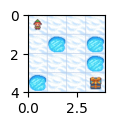

In [ ]:
print(pd.DataFrame(Q_table.round(decimals=3),columns=["←", "↓", "→", "↑"]))

print(policy_matrix(Q_table))

#Per visulizzare il gioco:
env.reset()
plt.rcParams["figure.figsize"] = [2.00, 1.00]
plt.imshow(env.render(mode='rgb_array'), extent=[0, 4, 4, 0]) # Display



# Q-learning: Off-policy TD Control

Il testo di Sutton e Barto, inizia così : *One of the early breakthroughs in reinforcement learning was the development of an off-policy TD control algorithm known as Q-learning (Watkins, 1989)*

Regola di update:


$Q(S_{t},A_{t}) = Q(S_{t},A_{t}) + α[R_{t+1} + γ \; \max \limits_{a} Q(S_{t+1},a) - Q(S_{t},A_{t}) ]$

Questa formula nasce dalla seguente idea:

si consideri la target policy, greedy rispetto $Q(s,a)$, ovvero che per ogni stato seleziona l'azione $a$ che massimizza il valore di $Q(s,a)$, in simboli :

$\pi(S_{t+1}) = \arg \max\limits_{a} Q(S_{t+1},a)  $


Sostitiendo nell'update di SARSA, la prossima azione  $A_{t+1}$ (ottenuta nel caso di SARSA on-line da una soft-policy) con un azione ricavata dalla target policy  $\pi(S_{t+1})$, che è deterministica ,  otteniamo:


$Q(S_{t},A_{t}) = Q(S_{t},A_{t}) + α[R_{t+1} + γ \; Q(S_{t+1},\arg \max\limits_{a} Q(S_{t+1},a)) - Q(S_{t},A_{t}) ]$

che è equivalente alla regola di update di sopra.

Si noti, nella restante parte dell'algoritmo Q-learning, l'azione $A_{t}$ è campionata dalla behavior policy (che è una soft-policy derivata da $Q$).

L'algoritmo di Q-learning è visto come un processo asincrono (asynchronous) nel senso che aggiorna una singola coppia stato-azione per ogni "step of episode".

$\;$

Convergenza

[Asymptotic convergence]

L'algoritmo Q-learning converge ad un optimal q-fuction se:

-  tutte le coppie stato-azione sono sottoposte a un processo di aggiornamento continuo ("all actions
are repeatedly sampled in all states") durante il training.

- e lo step-size α (o lerning rate ) scelto rispetta le consuente condizioni di converenga dei metodi TD Prediction, esposte sopra.

$\;$

Ref:

Technical Note : Q-Learning, di Watkins e Dayan.

https://www.gatsby.ucl.ac.uk/~dayan/papers/wd92.html


###Scenario FrozenLake-v1 classico, algoritmo Q-learning

In [ ]:
import gym
import pandas as pd
import numpy as np
import random
from collections import defaultdict
#per il rendering
from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display


# la funzione policy_matrix servirà per le valutazioni finali
def policy_matrix(Q):
    table = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    best_actions = np.argmax(Q, axis=1)
    policy = np.resize(best_actions, (4,4))
    return np.vectorize(table.get)(policy)

def epsilon_greedy(Q, s, epsilon):
    if random.uniform(0,1) < epsilon:
       # campiona una random action non-greedy
        supp = {0,1,2,3}.difference({np.argmax(Q[s, :])})
        su = list(supp)
        action = np.random.choice(su) #  uniform distribution over all entries
        return action
    else:
        # agisci greedy su Q
        return np.argmax(Q[s, :])

In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

n_states, n_actions = env.observation_space.n, env.action_space.n

#Inizializziamo il valore Q di tutte la coppie stato-azione a 0
Q_table = np.zeros((n_states, n_actions))

#Paramentri
alpha = 0.15  # learning rate

gamma = 0.9  # discount factor
epsilon = 0.8
num_episodes = 500 # (ricava una optimal policy già con soli 500 episodi!)

#
#Train loop, per ogni episodio ...
#

for i in range(num_episodes+1):

    s = env.reset()

    #debug
    if i > 0 and i % (num_episodes/5) == 0:
        # mostra solo gli stati più interessanti
        kk = pd.DataFrame((Q_table*100).round(decimals=2),columns=["←", "↓", "→", "↑"])
        print(kk.iloc[[0,1,4,13,14]])


    #per ogni step dell'episodio finchè non si arriva alla fine:
    while True:

        # behavior policy  : epsilon-greedy policy
        a = epsilon_greedy(Q_table,s,epsilon)

        #esegue l'azione selezionata e memorizza le informazioni sullo stato successivo:
        s_next, r, done, _ = env.step(a)

        #seleziona l'azione nello stato successivo utilizzando la policy epsilon greedy:
        a_max =  np.argmax(Q_table[s_next, :])

        #Q-learning update
        Q_table[s,a] = Q_table[s,a] + alpha * (r + gamma * Q_table[s_next,a_max] - Q_table[s,a])
        #print(f"Q_table[{s},{a}] = ", Q_table[s,a])

        if done:
            break

        #update next state to current state
        s = s_next


print("")
print(pd.DataFrame(Q_table.round(decimals=3),columns=["←", "↓", "→", "↑"]))

print(policy_matrix(Q_table))

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


      ←    ↓    →    ↑
0   0.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0
13  0.0  0.0  0.0  0.0
14  0.0  0.0  0.0  0.0
       ←     ↓      →     ↑
0   0.02  0.04   0.01  0.02
1   0.02  0.00   0.05  0.01
4   0.02  0.08   0.00  0.01
13  0.00  0.94   3.75  0.22
14  0.94  3.75  15.00  0.27
       ←     ↓      →     ↑
0   0.59  0.79   0.72  0.61
1   0.54  0.00   0.92  0.41
4   0.72  1.01   0.00  0.50
13  0.00  1.61   3.75  0.43
14  0.94  3.75  15.00  0.27
       ←     ↓      →     ↑
0   1.16  1.26   1.31  1.16
1   1.13  0.00   1.50  1.30
4   1.24  1.41   0.00  1.12
13  0.00  1.61   3.75  0.43
14  0.94  3.75  15.00  0.27
       ←     ↓      →     ↑
0   1.33  1.48   1.48  1.33
1   1.31  0.00   1.65  1.47
4   1.46  1.67   0.00  1.33
13  0.00  2.07   8.17  0.43
14  1.50  3.75  27.75  2.29

        ←      ↓      →      ↑
0   0.013  0.015  0.015  0.013
1   0.013  0.000  0.016  0.015
2   0.014  0.018  0.010  0.016
3   0.012  0.000  0.010  0.009
4   0.015  0.017  0.000  0.013
5  

## Come il Maximization Bias può influenzare (rallentando la convergenza) le prestazioni dell'algoritmo Q-learning

Nel testo di Sutton e Barto si legge: *there will be a positive maximization bias if we use the maximum of the estimates as an estimate of the maximum of the true values*.

*...*

*To see why, consider a single state $s$ where there are many actions $a$ whose true values, $q(s, a)$, are all zero but whose estimated values, $Q(s, a)$, are uncertain and thus distributed some above and some
below zero. The maximum of the true values is zero, but the maximum of the estimates is positive, a positive bias. We call this maximization bias*.

Problema:


In determinate circostanze, all'interno di specifici contesti stocastici, il processo di convergenza dell'algoritmo Q-learning può manifestare delle inefficienze. In alcune eventualità, la convergenza diviene addirittura irrealizzabile nella pratica, in quanto il numero di episodi necessari assume dimensioni eccessivamente elevate. Inoltre, una quantità di dati limitata determina stime caratterizzate da una scarsa accuratezza.

Motivazioni:

La regola di update si basa sul valore massimo delle stime: $ Q(S_{t+1},a_{1}), Q(S_{t+1},a_{2}), ... , Q(S_{t+1},a_{n})$ ottenute. Tuttavia, durante il training, questo massimo potrebbe non coincidere con il valore massimo dei rispettivi expected value:  $q(S_{t+1},a_{1})$ , $q(S_{t+1},a_{2}) ,...,  q(S_{t+1},a_{n})$ . Nella pratica, questo si verifica, sopratutto all'inizio del training, in ambienti stocastici con true value $q(s,a_{1})$ , $q(s,a_{2})$ , $q(s,a_{3})$, ..., $q(s,a_{n})$ simili tra loro, ed accompangati da campionamento che produce un alta varianza (o noise).



$\;$

Per capirci di più studiare: Example 6.7: Maximization Bias Example, PDF 156, Sutton e Barto.


Alcune considerazioni riguardo l'ambiente dell'Example 6.7:

Nello stato A, di partenza, posso essere scelte due azioni:
- "right" che porta allo stato terminale con reward = $0$;
- "left" che porta allo stato B, con reward immediato = $0$.

Nello stato B possono essere scelte  migliaia di azioni, ogniuna delle quali produce un reward che  segue l'andamento di una distribuzione normale con:  mean $-0.1$ e variance $1.0$. Per tanto il true value in B è $q(B,a) = -0.1 \; \;  ∀ a  $

Per quello che riguarda la funzione costo dello stato A, abbiamo:

$Q(A,right)= q(A,right) = 0$

$Q(A,left) = Q(A,left) + α ⋅ [ γ \; \max \limits_{a} Q(B,a) - Q(A,left)]$


Il true value è $q(A,left) = -0.1$; la sua stima $Q(A,left)$ , dipendendo dal valore massimo delle stime $Q(B,a_{1}), Q(B,a_{2}),..., Q(B,a_{n}) $  in un certo istante del training, potrebbe tendere ad essere positiva (basta che vi sia una sola stima del tipo $Q(B,a_{k}) = 0.2$); questo si verifica soprattutto all'inizio del training. Chiaramente la condizione $\max \limits_{a} Q(B,a)$, fa sì che sia più probabile che $Q(A,left)$ sia una sovrastima, anzichè una sottostima di  $q(A,left)$.

Ciò condiziona le prestazioni del processo di apprendimento:  soprattutto nelle prime fasi, la behavior policy: ϵ-greedy, nello stato $A$  favorisce l'azione "left", che produce delle stime $Q(B,left) > Q(A,right)= 0$; causando di fatto un rallentamento del processo di convergenza ed uno spreco di risorse computazionali.



$\;$

Nota in merito al grafico Figure 6.5, riportato nel testo a pag PDF 157:

scelta una ϵ-greedy policy per generare i dati, per la quale, l'azione selezionata sarà greedy con probabilità: $1 -ϵ + \frac{ϵ}{|Action(state)|} $ , mentre sarà non-greedy con probabilità $\frac{ϵ}{|Action(state)|} $. $\;$ Fissati $ϵ = 0.1$ , e la cardinalità $|Action(state = A)| = 2$; allora abbiano una probabilità di estrarre l'azione greedy pari al $95 \% $; mentre nel $5 \% $ sarà non-greedy.








## Double Q-learning (double estimator method) -- ovvero una soluzione proposta (non è l'unica nè del tutto risolutiva) per mitigare gli effetti del Maximization Bias.

Ref:

Hado van Hasselt paper's:

https://proceedings.neurips.cc/paper_files/paper/2010/file/091d584fced301b442654dd8c23b3fc9-Paper.pdf

Corso di Hado van Hasselt:

https://hadovanhasselt.com/2016/01/12/ucl-course/



https://www.youtube.com/watch?v=t9uf9cuogBo






$\;$





Van Hasselt individua nella formula la causa del problema:

$  Q(S_{t+1},\arg \max\limits_{a} Q(S_{t+1},a))$

in quanto, si usa la stessa funzione $Q$, nello stato  $S_{t+1}$, sia per selezionare l'azione, ovvero: $\arg \max\limits_{a} Q(S_{t+1},a)$, sia per assegnare a tale azione un valore: $Q(S_{t+1},\arg \max\limits_{a} Q(S_{t+1},a))$.


$\;$

Algoritmo Double Q-learning:

Fase 0:

Inizializzazione  $Q_{1}$ e $Q_{2}$


Fase 1:

Per ogni episodio, dato un certo stato $S_{t}$ seleziona una azione $A_{t}$ derivante da una behavior policy, ad esempio un ϵ-greedy policy, basata sia su $Q_{1}$ che $Q_{2}$, ed esempio su $\frac{Q_{1} + Q_{2}}{2}$

Esegui l'azione $A_{t}$ , e memorizza i risultati $R_{t+1}$ e $S_{t+1}$ ottenuti

Fase 2:


Scegli random se fare un update su $Q_{1}$, oppure su $Q_{2}$.

Update rule:

$ 50\% $ delle volte :

Definisci $a^{*} = \arg \max\limits_{a} Q_{1}(S_{t+1},a)$

$Q_{1}(S_{t},A_{t}) = Q_{1}(S_{t},A_{t}) + α[R_{t+1} + γ \; Q_{2}(S_{t+1},a^{*}) - Q_{1}(S_{t},A_{t}) ]$

Altro $50\%$ delle volte :

Definisci $b^{*} = \arg \max\limits_{a} Q_{2}(S_{t+1},a)$

$Q_{2}(S_{t},A_{t}) = Q_{2}(S_{t},A_{t}) + α[R_{t+1} + γ \; Q_{1}(S_{t+1},b^{*}) - Q_{2}(S_{t},A_{t}) ]$


Fase Conclusiva:

Ripeti algoritmo fino a convergenza.


$\;$

Note sull'algoritmo :

- Sebbene per stimare il true value $q$ apprendiamo due stimatori, $Q_{1}$ e $Q_{2}$ , solo uno alla volta viene aggiornato ad ogni step. È fondamentale infatti che le due stime $Q$ apprendano da sequenze di esperienze diverse (in pratica se ad ogni step, si aggiornano contemporaneamente entrambe le $Q$ con la stessa azione estratta, abbiamo il caso classico del Q-learning). Tuttavia, per la selezione dell'azione da eseguire, è possibile utilizzare entrambe le funzioni $Q$.




- Hado van Hasselt scrive : *The obtained double estimator method is shown to sometimes underestimate rather than overestimate the maximum expected value.*

$\;$


Convergenza

[Asymptotic convergence]

è garantita sotto le stesse condizioni dell'algoritmo Q-lerning.

$\;$

Domanda aperta, cosa succede se:

$a^{*} = \arg \max\limits_{a} Q_{1}(S_{t+1},a)$


$b^{*} = $ giusto l'azione successiva estratta secondo le condizioni della soft-policy

oppure se:

$b^{*} = \arg \min\limits_{a} Q_{2}(S_{t+1},a)$



# $n$-step (o multi step) TD methods


Idea di base

Si consideri la traiettoria ottenuta da una certa policy $\pi$ : $ S_t, A_t, R_{t+1} , S_{t+1}, A_{t+1}, R_{t+2}, ... , R_{T}, S_{T} \; $.

Sia $T$ il terminale step.  Ed il "return" ottenuto  partendo da un certo step $t$:

$G_{t} =  R_{t+1} + \gamma R_{t+2}+ \gamma^{2} R_{t+3} + ... + \gamma^{T-t-1}R_{T} $.

Sia $V$ una stima della value fucntion $V_{\pi}$

$\;$

Definizioni:

one-step return :  $G_{t}^{1step} =  R_{t+1} + \gamma V(S_{t+1})$


two-step return :  $G_{t}^{2step} =  R_{t+1} + \gamma R_{t+2}+ \gamma^{2} V(S_{t+2})$

...


$n$-step return :  $G_{t}^{nstep} =  R_{t+1} + \gamma R_{t+2}+ ... + \gamma^{n-1}R_{t+n} + \gamma^{n} V(S_{t+n})$

...

∞-step return :

$G_{t}^{∞step} =  R_{t+1} + \gamma R_{t+2}+ ... + \gamma^{T-t-1}R_{T}$

$\;$

Abbiamo così definito "$n$-step returns", partendo da un stato $S_{t}$,  come somma dei primi $n$ rewards, più la stima della value fuction nello stato $S_{t+n}$ raggiunto in $n$ step, opportunamente scontati da $\gamma$

$\;$


L'algoritmo $n$-step TD learning prediction, prevede in primis di fissare un numero di step che rappresenta il limite massimo di passi da considerare, ad esempio $n = 4$.

La regola di update è sostanzialmente la seguente:

$V_{t+n}(S_{t}) = V_{t+n-1}(S_{t})  + \alpha [G_{t}^{n-step} - V_{t+n-1}(S_{t})] $

Nel nostro esempio, si sfruttano gli "$n$-step returns" , per $n$ che va da $1$ a $4$.  Il tutto sarà più chiaro nel codice $n$-step SARSA sviluppato di sotto

È interessante notare che, nel caso di one-step return, l'update coincide con l' update TD(0), mentre per ∞-step questo coincide con l'update: constant- α  MC.




$\;$

Qual'è il valore da attribuire ad $n$ per ottenere le migliori prestazioni?

Sfortunatamente, al momento non è stato trovato un valore teoricamente migliore per $n$; dipende dalla particolare applicazione e dalla funzione di ricompensa. Tuttavia, l'esperienza suggerisce che valori di $n$ compresi tra $4$ e $8$ risultino generalmente più efficienti. A riguardo vedi Figure 7.2 PDF 167 nel testo di Sutton e Barto.


$\;$


Convergenza

In primis, come si può osservare dalle formule sopra riportate,  l' $n$-step return usa la stima $V$, per "coprire" le ricompense mancanti dopo un certo $R_{t+n}$.

Sia il Maximum expected error usando $n$-step return:

$ \max\limits_{s} |\mathbb{E}_{\pi}[G_{t}^{n-step}| S_{t} = s] - V_{\pi} |$

Sia il Maximum error usando $V$:

$ \gamma^{n} \max\limits_{s} |V(s) - V_{\pi} |$


Abbiamo la seguente proprietà, Error reduction property:


Maximum expected error usando $n$-step return $≤$  Maximum error usando $V  \; $   


 $ \forall n \ge 1$.


Utilizzando questa proprietà, si può dimostrare che i metodi TD  $n$-step convergono. Nel testo di Sutton PDF 166, si legge Sutton: *Because of the error reduction property, one can show formally that all n-step TD methods converge to the correct predictions under appropriate technical conditions*



$\;$


Tra le righe, si accenna all' esistenza, di una sorta di estenzione dell'algoritmo TD $n$-step, ovvero l'algoritmo TD(λ).
L' idea di base è sintetizzata nella formulazione di $G_{t}^{λ}$ sottostante; cioè attraverso la media esponenziale di un parametro λ ∈ [0, 1]; ed il fattore di normalizzaizione $(1-λ)$, che ci assicura che la somma dei "weights" sia $1$, abbiamo:

$G_{t}^{λ} = (1-λ) \sum_{n=1}^{∞} λ^{n-1} G_{t}^{nstep}$


Questo verrà approffondito in seguito (Sutton e Barto PDF 309).





## $n$-step TD control : SARSA, scenario FrozenLake-v1 8x8

In contesti come quello di FrozenLake 8x8, in cui ci sono molti stati ed un solo reward lontano dalla posizione di partenza; i metodi TD $n$-step, tendono ad apprendere di più ed in modo più efficente, a parità di episodi, rispetto al caso TD one-step.


In [ ]:
import gym
import pandas as pd
import numpy as np
import random
from collections import defaultdict
#per il rendering
from matplotlib import pyplot as plt
%matplotlib inline
from IPython import display


def policy_matrix(Q):
    table = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    best_actions = np.argmax(Q, axis=1)
    policy = np.resize(best_actions, (8,8))
    return np.vectorize(table.get)(policy)


def epsilon_greedy(Q, s, epsilon):
    if random.uniform(0,1) < epsilon:
      # campiona una random action non-greedy
        supp = {0,1,2,3}.difference({np.argmax(Q[s, :])})
        su = list(supp)
        action = np.random.choice(su) #  uniform distribution over all entries
        return action
    else:
        # agisci greedy su Q
        return np.argmax(Q[s, :])

### Premessa Tecnica, per capire l'algoritmo

In [ ]:
# Simulazione, lavoriamo su un ipotetico episodio tipo FrozenLake

n_states = 7
n_actions = 4

n_step = 4

Q = np.zeros((n_states, n_actions)).round(2)
print(Q,"\n")

stored_states  = {}
stored_actions = {}
stored_rewards = {}

epi = [0,1,2,3,4,5,6]
act = [1,2,3,1,2,3]
rew = [0,0,0,0,0,1]

s = epi[0]
a = act[0]

stored_states[0] = s
stored_actions[0] = a

T = np.inf
t = 0
tau = 0

while tau < T-1:
  if t < T:
     s_, r_ = epi[t+1], rew[t]

     if s_ == epi[6]:
       # arrivati allo stato Terminale si gettano le condizioni per uscire dal loop.
       # Nota non c'è bisogno di aggiornare l'azione
       T = t + 1
       print("\tT =", T)
     else:
       a_ = act[t+1]

    # Memorizza action, reward and state
     stored_rewards[t+1] = r_
     stored_states[t+1]  = s_
     stored_actions[t+1] = a_
     print("t =", t)
     print("stored_rewards - stored_states - stored_actions")
     print(stored_rewards,stored_states,stored_actions)

  if t >= T:  # serve solo a rendere più leggibile output
    print("")

  tau = t - n_step + 1
  print(f"tau = {t} - {n_step} + 1  = ", tau)


 # Se per esempio abbimo n_step = 3 ; current t = 5 ; allora
 # tau = t-n_step+1 = 5-3+1 = 3,
 # il che significa che quando l'agente raggiunge il t = 5,
 # verifichiamo la condizione  "if tau >= 0"
 # ed il valore Q [s_tau, a_tau] verrà aggiornato.
 # Se invece, siamo in uno stato iniziale, ad esempio abbiamo eseguito solo due step, e siamo nel current t = 1
 # Per n_step = 3, τ = -1 e non accediamo al if successivo, cioè "if tau >= 0"
 # e continuiamo a generare mosse, o meglio coppie (state,action) e reward.

  if tau >= 0:
      print("Formazione di G come somma di reward stored ")
      G = 0
      for j in range( tau+1, min(tau+n_step,T)+1 ):
         sG = 0.5**(j-tau-1) * stored_rewards[j]
         print(f"0.5**{(j-tau-1)} * {stored_rewards[j]} = ",sG)
         G = G + sG  # Sommiamo ciascun reward ottenuto nella finestra temporale : ( tau+1, min(tau+n_step,T)+1 )

      print("G = ", G)

      G +=  0.5**n_step * Q[stored_states[tau+n_step], stored_actions[tau+n_step]] if tau + n_step < T else 0

      if tau + n_step <  T:
         print(f"Per update di G ci servirà Q[{stored_states[tau+n_step]}, {stored_actions[tau+n_step]}] : ", Q[stored_states[tau+n_step], stored_actions[tau+n_step]])
         # cioè la stima della Q-value dello stato in cui siamo arrivati dopo 4-step (e l'azione = a{tau+n_step})
      else :
         print(f"In quanto stato terminale, per update di G ci servirà di Q[6,.] = ", 0)
      print("G+ = ", G)

      a_tau = stored_actions[tau]
      s_tau = stored_states[tau]

      Q[s_tau,a_tau] += 0.9 * ( G - Q[s_tau,a_tau] )
      print(f"Update di Q sarà fatto su Q[{s_tau},{a_tau}] :" , Q[s_tau,a_tau])
  a = a_
  t += 1

print("\n",Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

t = 0
stored_rewards - stored_states - stored_actions
{1: 0} {0: 0, 1: 1} {0: 1, 1: 2}
tau = 0 - 4 + 1  =  -3
t = 1
stored_rewards - stored_states - stored_actions
{1: 0, 2: 0} {0: 0, 1: 1, 2: 2} {0: 1, 1: 2, 2: 3}
tau = 1 - 4 + 1  =  -2
t = 2
stored_rewards - stored_states - stored_actions
{1: 0, 2: 0, 3: 0} {0: 0, 1: 1, 2: 2, 3: 3} {0: 1, 1: 2, 2: 3, 3: 1}
tau = 2 - 4 + 1  =  -1
t = 3
stored_rewards - stored_states - stored_actions
{1: 0, 2: 0, 3: 0, 4: 0} {0: 0, 1: 1, 2: 2, 3: 3, 4: 4} {0: 1, 1: 2, 2: 3, 3: 1, 4: 2}
tau = 3 - 4 + 1  =  0
Formazione di G come somma di reward stored 
0.5**0 * 0 =  0.0
0.5**1 * 0 =  0.0
0.5**2 * 0 =  0.0
0.5**3 * 0 =  0.0
G =  0.0
Per update di G ci servirà Q[4, 2] :  0.0
G+ =  0.0
Update di Q sarà fatto su Q[0,1] : 0.0
t = 4
stored_rewards - stored_states - stored_actions
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0} {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5} {0: 1,

In altri termini; sia data la catena di eventi per un certo episodio; arrivati allo stato $s_{4}$, ed estratta anche l'azione successiva $a_{4}$ , ma non eseguita :

$ s_{0} \xrightarrow[{ a_{0} ,\; R_{1}  }] {{t = 0}}  s_{1} \xrightarrow[{ a_1 ,\; R_{2}  }] {{t = 1}}  s_{2} \xrightarrow[{ a_2 ,\; R_{3}  }] {{t = 2}}   s_{3} \xrightarrow[{ a_3 ,\; R_{4}  }] {{t = 3}}   s_{4} \xrightarrow[{ a_4 }] {}
$

Iniziano gli aggiornamente dei valori i $Q$. Il valore della $Q[s_{0},a_0]$ viene aggiornato utilizzando (principalmente) la somma scontata: dei reward ottenuti, cioè da 1 a 4, e del valore della $Q$, nello stato raggiunto dopo aver eseguito 4 step, ovvero $Q[s_{4},a_4]$.

Continuando con il procediemento:


$ s_{4} \xrightarrow[{ a_{4} ,\; R_{5}  }] {{t = 4}}  s_{5} \xrightarrow[{ a_5 ,\; R_{6}  }] {{t = 5}}  s_{6}  \text{  Terminal_state}
$

Continuiamo i nostri aggiornamenti:

$Q[s_{1},a_1]  ← \text{  update con: }   R_{2:5} + Q[s_{5},a_5]$

Si noti, usando il formalismo introdotto all'inizio, per update, più precisamente, si usa:

 $G^{4step}_{1} =   R_{2} + \gamma R_{3} +  \gamma^{2}R_{4} +   \gamma^{3}R_{5} +  \gamma^{4} Q[s_{5},a_5] $

E poi:

$Q[s_{2},a_2] ← \text{  update con: }   R_{3:6} + Q[s_{6},a ⋅]$

Qui abbiamo il primo reward diverso da zero, $R_{6} = 1$ . Si ricorda che nello stato terminale $Q[s_{6},a ⋅] = 0 $.

Algoritmo continua con gli aggiornamenti della $Q$ table, è in questa continuazione tutto il vantaggio informativo (riguardo alla distribuzione dell'informazione) rispetto a caso SARSA one-step:

$Q[s_{3},a_3] ← \text{  update con: }   R_{4:6} + Q[s_{6},a ⋅]$

$Q[s_{4},a_4] ← \text{  update con: }  R_{5:6} + Q[s_{6},a ⋅]$

$Q[s_{5},a_5] ← \text{  update con: }   R_{6} + Q[s_{6},a ⋅]$

Si noti:

l'ultimo rigo si riconduce al classico il one-step return.

### Training Loop SARSA $n$-step

In [ ]:
# il codice sottostante prende ispirazione dal codice:
# https://github.com/lucasrm25/Reinforcement-Learning/blob/master/ex06-nstep/ex06-nstep.py


env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False)

n_states, n_actions = env.observation_space.n, env.action_space.n


#Paramentri
alpha = 0.18  # learning rate
gamma = 0.9  # discount factor
num_episodes = 2_000


#
#Train loop, per ogni episodio ...
#

def sarsa_n_step(n_step, epsilon):

  # serviranno per grafico e statistiche finali
  episode_rewards = np.zeros(num_episodes+1)
  episode_lengths = np.zeros(num_episodes+1)

  #Inizializziamo il valore Q di tutte la coppie stato-azione a 0
  Q_table = np.zeros((n_states, n_actions))

  cont_eps = 1 # utility per garantire la condizione di GLIE

  for i in range(num_episodes+1):

    #Update di epsilon
    #di modo che, con il passare degli episodi, la soft-policy preferisca
    #una strategia sempre più greedy e meno espolorativa
    if i > 0 and i % (num_episodes/5) == 0:
        cont_eps = cont_eps + 0.15
        epsilon = epsilon/cont_eps


    stored_actions = {}
    stored_rewards = {}
    stored_states  = {}

    s = env.reset()

    a = epsilon_greedy(Q_table,s,epsilon)

    stored_states[0] = s
    stored_actions[0] = a

    T = np.inf  # Massimo numero di time steps, al momento ci appoggiamo il valore più grande che il compilatore possa gestire
    t = 0       # "current episode" time step, questo parte da 0, 1, 2 … ed arriva fino alla fine
    tau = 0     # tau è il time-step in cui stima Q viene aggiornata

    while tau < T-1:

        # Questo if valuta se lo stato non è terminale o è stato raggiunto il numero massimo di time step
        if t < T:

            # produce il prossimo stato e reward r_ = Rt+1, s_ = St+1
            s_, r_, done, _ = env.step(a)

            # se raggiungiamo uno stato terminale done == True
            if done:
                 T = t + 1  # # tale istruzione impedisce all'algoritmo di accedere al "if t < T:" iniziale, in quanto diventa t > T
            else:
                 a_ = epsilon_greedy(Q_table,s_,epsilon)

            # Memorizza action, reward and state
            stored_rewards[t+1] = r_
            stored_states[t+1]  = s_
            stored_actions[t+1] = a_

        tau = t - n_step + 1
        # NOTA il "+1" finale nella formula tau contempla il caso di t = 0

        if tau >= 0:   # Se abbiamo elaborato almeno n stati o raggiunto quello terminale, siamo in grado di aggiornare Q

                G = np.sum([
                    gamma**(j-tau-1) * stored_rewards[j]
                    for j in range( tau+1, min(tau+n_step,T)+1 ) ])

                G += gamma**n_step * Q_table[stored_states[tau+n_step], stored_actions[tau+n_step]] if tau + n_step < T else 0
                # NOTA  su: " if tau + n_step < T else 0 "
                # Lo stato terminale implica che Q(s'=Terminal,a') = 0
                # Questa condizione si applica nel caso abbiamo T = t + 1 , se done == True

                # Ricava lo state e dell' action al time-step tau, da usare dentro Q
                s_tau = stored_states[tau]
                a_tau = stored_actions[tau]

                # update Q
                Q_table[s_tau,a_tau] += alpha * ( G - Q_table[s_tau,a_tau] )

                if i < 80 and Q_table[s_tau,a_tau] > 0:
                    print("Episodio :  ", i)
                    print("t : ", t,", tau : ", tau)
                    print(f"Q_table[{s_tau},{a_tau}] : ",Q_table[s_tau,a_tau],"\n")


        # update state, action
        s, a = s_, a_
        # incrementa  il current time step
        t += 1

    episode_rewards[i] = sum(stored_rewards.values())
    episode_lengths[i] = len(stored_rewards.values())

  return Q_table, episode_rewards, episode_lengths



In [ ]:
Q_table1, episode_rewards1, episode_lengths1 = sarsa_n_step(n_step = 4,epsilon = 0.8)
# Nota, 0.8 è il valore di partenza di epsilon, durante il training verrà modificato, descreserà (GLIE)

Q_table2, episode_rewards2, episode_lengths2 = sarsa_n_step(n_step = 1,epsilon = 0.8)


Episodio :   65
t :  84 , tau :  81
Q_table[47,3] :  0.13122 

Episodio :   65
t :  85 , tau :  82
Q_table[39,1] :  0.1458 

Episodio :   65
t :  86 , tau :  83
Q_table[47,1] :  0.162 

Episodio :   65
t :  87 , tau :  84
Q_table[55,1] :  0.18 

Episodio :   73
t :  33 , tau :  30
Q_table[31,1] :  0.0172186884 

Episodio :   73
t :  34 , tau :  31
Q_table[39,2] :  0.019131876 

Episodio :   73
t :  35 , tau :  32
Q_table[39,2] :  0.03694577832 

Episodio :   73
t :  36 , tau :  33
Q_table[39,2] :  0.1615155382224 

Episodio :   73
t :  37 , tau :  34
Q_table[39,1] :  0.26535600000000004 

Episodio :   73
t :  38 , tau :  35
Q_table[47,1] :  0.29484 

Episodio :   73
t :  39 , tau :  36
Q_table[55,1] :  0.3276 

Episodio :   74
t :  35 , tau :  32
Q_table[7,1] :  0.0020334926626632004 

Episodio :   74
t :  36 , tau :  33
Q_table[15,2] :  0.019074662032988993 

Episodio :   74
t :  37 , tau :  34
Q_table[15,1] :  0.019074662032988993 

Episodio :   74
t :  39 , tau :  36
Q_table[31,1] :

In [ ]:
#print(pd.DataFrame(Q_table1.round(decimals=3),columns=["←", "↓", "→", "↑"]))
print("n-step\n",policy_matrix(Q_table1))

average1 = sum(episode_lengths1)/len(episode_lengths1)
print("Durata media episodi :",int(average1) )
print("\n")

#print(pd.DataFrame(Q_table2.round(decimals=3),columns=["←", "↓", "→", "↑"]))
print("one-step\n",policy_matrix(Q_table2))

average2 = sum(episode_lengths2)/len(episode_lengths2)
print("Durata media episodi :",int(average2) )

n-step
 [['→' '→' '→' '→' '→' '→' '↓' '←']
 ['→' '→' '↑' '↑' '→' '→' '↓' '←']
 ['↑' '↑' '↑' '←' '→' '→' '→' '↓']
 ['↑' '↑' '↓' '→' '↑' '←' '→' '↓']
 ['↑' '↑' '←' '←' '→' '→' '→' '↓']
 ['↑' '←' '←' '←' '←' '←' '←' '↓']
 ['←' '←' '←' '←' '←' '←' '←' '↓']
 ['←' '←' '←' '←' '←' '←' '←' '←']]
Durata media episodi : 28


one-step
 [['←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '←' '←' '←']
 ['←' '←' '←' '←' '←' '→' '→' '↓']
 ['←' '←' '←' '←' '←' '←' '←' '↓']
 ['←' '←' '←' '←' '←' '←' '←' '↓']
 ['←' '←' '←' '←' '←' '←' '←' '←']]
Durata media episodi : 58


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


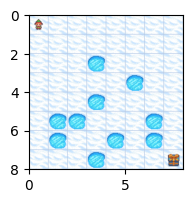

In [ ]:
env.reset()
plt.rcParams["figure.figsize"] = [3.00, 2.00]
plt.imshow(env.render(mode='rgb_array'), extent=[0, 8, 8, 0]) # Display

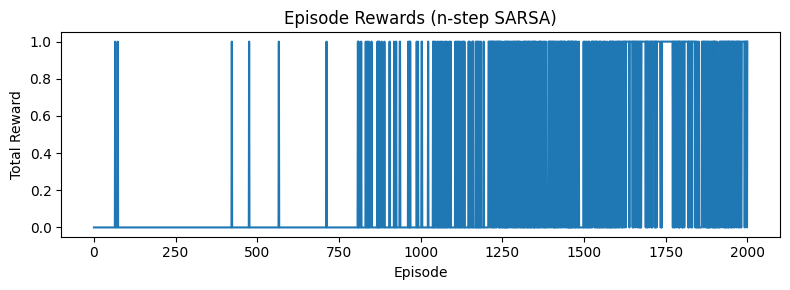

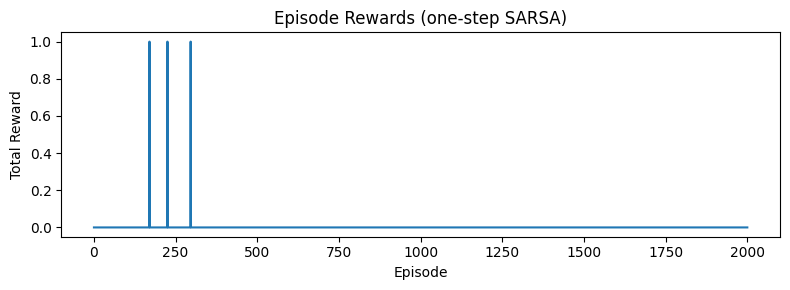

In [ ]:
# Grafici

plt.figure(figsize=(8, 3))
plt.plot(episode_rewards1)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode Rewards (n-step SARSA)')


plt.tight_layout()
plt.show()

# Plot the learning curve
plt.figure(figsize=(8, 3))
plt.plot(episode_rewards2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode Rewards (one-step SARSA)')



plt.tight_layout()
plt.show()


Il one-step SARSA ha raggiunto il reward finale solo in tre episodii su 2000. Questo chiaramente rallenta enormemente l'apprendimento (nei soli 2000 episodi lo impedisce del tutto! Ce ne vorrebbero molti di più), in particolare rallenta la distribuzione dell'informazione attraverso il "bootstrapping".

Discorso ben diverso nel caso $n$-step SARSA, dopo 2000 episodi abbiamo una buona bozza dell'optimal policy.